In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

df = pd.read_csv("Dataset.csv")

df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [46]:
df.shape

(9551, 21)

In [47]:
#checking for new values

duplicate = df[df.duplicated()]
duplicate.shape

(0, 21)

In [48]:
#checking for null values

missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [49]:
df['Cuisines'].fillna('Unknown', inplace=True)

missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [50]:

missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [51]:
df.duplicated().sum()

0

In [52]:
df['Aggregate rating'] = df['Aggregate rating'].astype(str)
df['Aggregate rating'] = df['Aggregate rating'].apply(lambda x: x.replace(',','.'))
df['Aggregate rating'] = df['Aggregate rating'].astype(float)

In [53]:
restaurants = list(df['Restaurant Name'].unique())
df['Mean Rating'] = 0

for i in range(len(restaurants)):
    df['Mean Rating'][df['Restaurant Name'] == restaurants[i]] = df['Aggregate rating'][df['Restaurant Name'] == restaurants[i]].mean()

<ipython-input-53-fcefb84db9c2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
df[['Mean Rating']] = scaler.fit_transform(df[['Mean Rating']]).round(2)

In [55]:
df[['Restaurant Name','Aggregate rating','Mean Rating']].head()

,Restaurant Name,Aggregate rating,Mean Rating
0,Le Petit Souffle,4.8,4.92
1,Izakaya Kikufuji,4.5,4.67
2,Heat - Edsa Shangri-La,4.4,4.59
3,Ooma,4.9,5.00
4,Sambo Kojin,4.8,4.92


In [56]:
df["Rating text"] = df["Rating text"].str.lower()

In [57]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df["Rating text"] = df["Rating text"].apply(lambda text: remove_punctuation(text))

Text(0.5, 0, 'Number of outlets')

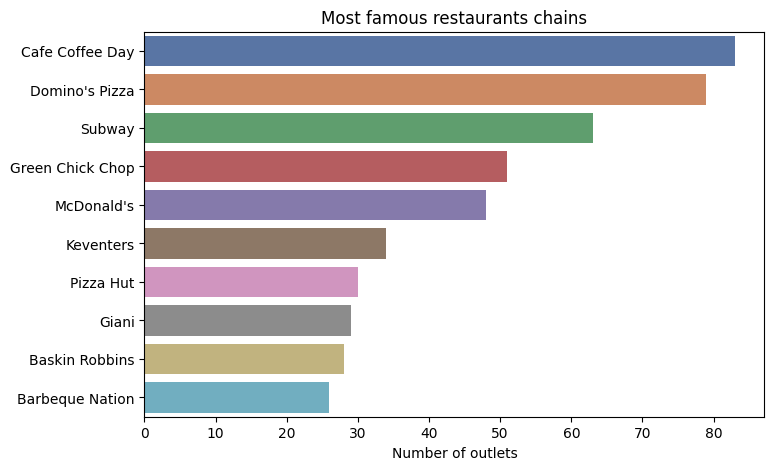

In [58]:
plt.figure(figsize=(8,5))
chains=df['Restaurant Name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains")
plt.xlabel("Number of outlets")

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.



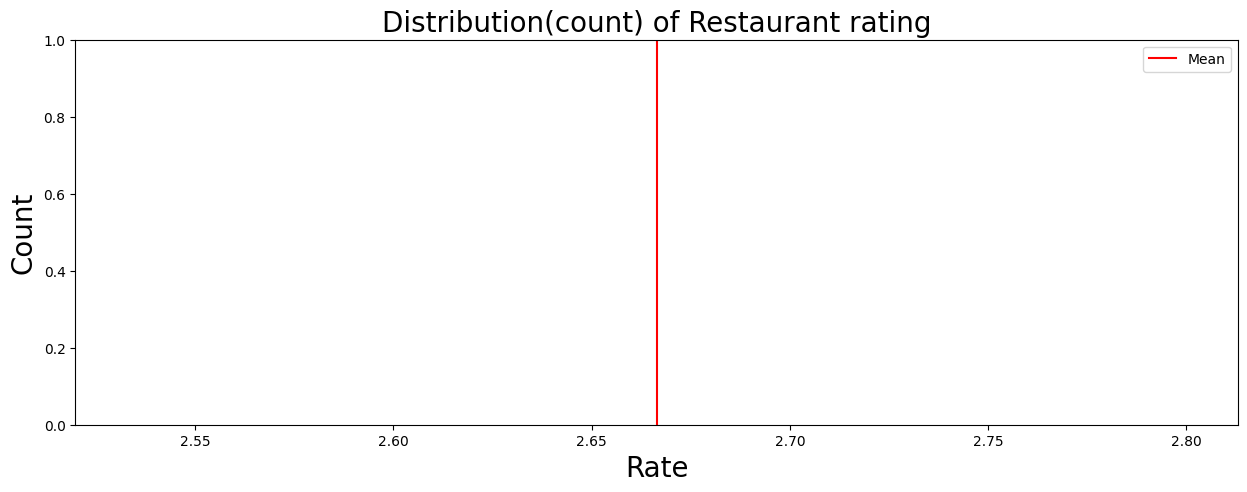

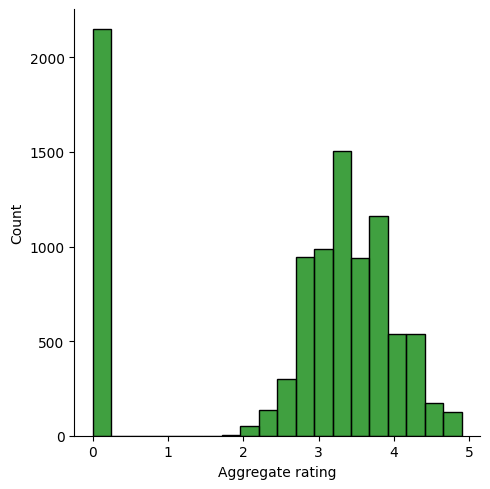

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.displot(df['Aggregate rating'],kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(df['Aggregate rating'].mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

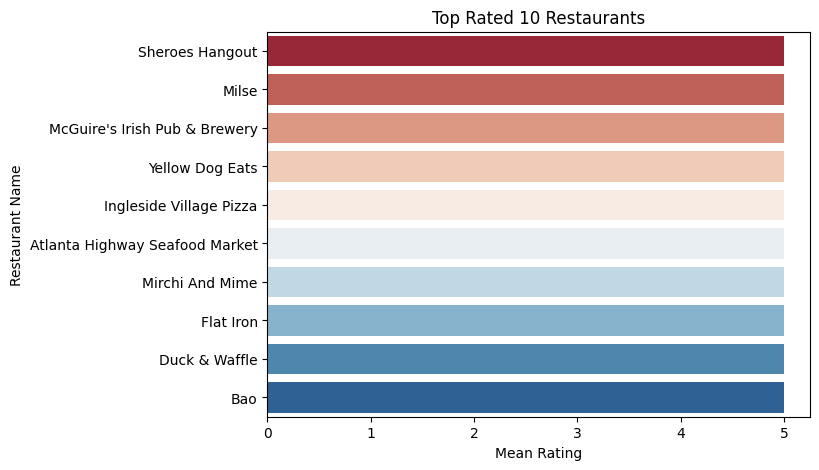

In [60]:
df_rating = df.drop_duplicates(subset='Restaurant Name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='Mean Rating', y='Restaurant Name', palette='RdBu')
plt.title('Top Rated 10 Restaurants');

In [61]:

from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(column, top_nu_of_words, nu_of_word):

    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')

    bag_of_words = vec.fit_transform(column)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:top_nu_of_words]

In [62]:
df_percent = df.sample(frac=0.5)
# Check the columns in your DataFrame
print(df_percent.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Mean Rating'],
      dtype='object')


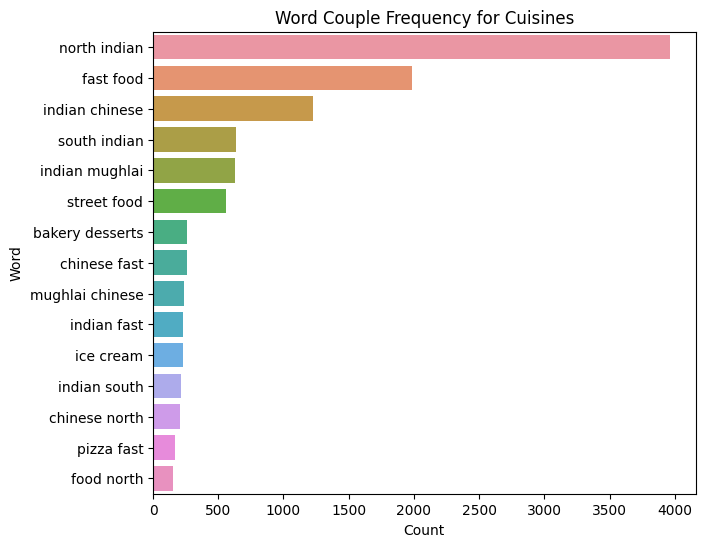

In [63]:

lst = get_top_words(df['Cuisines'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');

In [65]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['Rating text'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [77]:
def recommend(name, cosine_similarities=cosine_similarities):
    recommend_restaurant = []

    idx = indices[indices == name].index[0]

    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    top30_indexes = list(score_series.iloc[0:31].index)

    df_list = []

    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])

        # Check if there are any rows before sampling
        condition_rows = df_percent[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Average Cost for two']][df_percent.index == each]
        if not condition_rows.empty:
            df_list.append(condition_rows.sample())

    df_new = pd.concat(df_list)

    df_new = df_new.drop_duplicates(subset=['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Average Cost for two'], keep=False)
    df_new = df_new.sort_values(by='Aggregate rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    return df_new

recommend('Ooma')



TOP 10 RESTAURANTS LIKE Ooma WITH SIMILAR REVIEWS: 


,Restaurant Name,Cuisines,Aggregate rating,Average Cost for two
1385,Crazy Bhukkhad,"North Indian, Chinese",3.9,400
2464,Kobe Sizzlers,"Continental, American",3.7,1000
1391,The Baker's Bar ... Bakery & Cafe,"Italian, Lebanese, Fast Food, Bakery",3.6,400
1387,Fomads,"North Indian, Chinese",3.6,300
1394,ZASTY,"Continental, North Indian, Asian",3.5,500
3275,Aim Delhi Cafe,Cafe,3.4,400
3940,The Foodie Cafe,"Chinese, Fast Food",3.4,250
1374,The Royal,"Fast Food, Beverages",3.3,550
3937,Southy,South Indian,3.1,450
1375,Theka Desi Khaana,"North Indian, Chinese",3.0,350
